# Flight Price Prediction
## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

- Size of training set: 10683 records

- Size of test set: 2671 records

### FEATURES:
- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

### Label:

- Price: The price of the ticket

# Importing Necessary Libraries

In [1]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm


######################################
       Import Key Packages            
######################################


# Importing Dataset

In [2]:
df = pd.read_excel("Data_Train.xlsx")
test= pd.read_excel("Test_set.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Checking Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observation - 
- We can see one record for Route is having null value
- One record for Total stops is having null value

So I am dropping the rows


In [6]:
df.dropna(inplace = True)
test.dropna(inplace = True)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null values are removed

# EDA

### lets take a close look at Journey Date

In [8]:
df['Date_of_Journey'].dtypes

dtype('O')

#### Observation- As I can Date_of_Journey is object type but it should be in datetime format so I am extracting date and month and making seperate columns to predict better and dropping the Date_of_Journey column as it would be of no use for the prediction

In [9]:
df["Journey day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
df["Journey month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test["Journey month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [11]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Journey day      10682 non-null  int64 
 11  Journey month    10682 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


### Lets check now the departure time column

In [13]:
df['Dep_Time'].dtypes

dtype('O')

#### Observation- As I can Departure time is object type but it should be in time format so I am extracting hour and minutes and making seperate columns to predict better and dropping the departure time column as it would be of no use for the prediction

In [14]:
df["Departure hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
test["Departure hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour

In [15]:
df["Departure min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
test["Departure min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

In [16]:
df.drop(["Dep_Time"], axis = 1, inplace = True)
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey day,Journey month,Departure hour,Departure min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


### Same way I will work with arival time as well

In [19]:
df["Arrival hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
test["Arrival hour"] = pd.to_datetime(test["Arrival_Time"]).dt.hour

In [20]:
df["Arrival min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
test["Arrival min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute

In [21]:
df.drop(["Arrival_Time"], axis = 1, inplace = True)
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey day,Journey month,Departure hour,Departure min,Arrival hour,Arrival min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey day      10682 non-null  int64 
 9   Journey month    10682 non-null  int64 
 10  Departure hour   10682 non-null  int64 
 11  Departure min    10682 non-null  int64 
 12  Arrival hour     10682 non-null  int64 
 13  Arrival min      10682 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


### Let check the Duration column

#### Observation- As I can see that Duration is also in object type so I will make a seperte column which will contain the total duration in minutes and drop the duration column

In [24]:
d= list(df["Duration"])
t= list(test["Duration"])

I am adding the 0 mins if no mins is present in the data so that we dont get out of range error

In [25]:
for i in range(len(d)):
    if len(d[i].split()) != 2:    
        if "h" in d[i]:
            d[i] = d[i].strip() + " 0m"  
        else:
            d[i] = "0h " + d[i]

In [26]:
for i in range(len(t)):
    if len(t[i].split()) != 2:    
        if "h" in t[i]:
            t[i] = t[i].strip() + " 0m"  
        else:
            t[i] = "0h " + t[i]

In [27]:
dh = []
for i in range(len(d)):
    dh.append((int(d[i].split(sep = "h")[0])*60)+(int(d[i].split(sep = "m")[0].split()[-1])))  


In [28]:
th = []
for i in range(len(t)):
    th.append((int(t[i].split(sep = "h")[0])*60)+(int(t[i].split(sep = "m")[0].split()[-1])))

In [29]:
df["Duration(mins)"] = dh
test["Duration(mins)"] = th

In [30]:
df.drop(["Duration"], axis = 1, inplace = True)
test.drop(["Duration"], axis = 1, inplace = True)

In [31]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey day,Journey month,Departure hour,Departure min,Arrival hour,Arrival min,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,160


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey day      10682 non-null  int64 
 8   Journey month    10682 non-null  int64 
 9   Departure hour   10682 non-null  int64 
 10  Departure min    10682 non-null  int64 
 11  Arrival hour     10682 non-null  int64 
 12  Arrival min      10682 non-null  int64 
 13  Duration(mins)   10682 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


### Now lets check the Additional info column

In [33]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

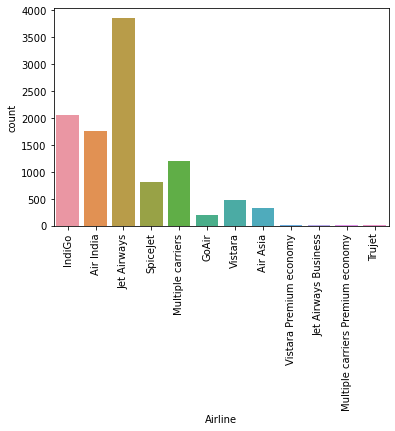

In [34]:
sns.countplot(df['Airline'])
plt.xticks(rotation=90)

#### Observation- Jet Airways has highest flight bookings and Trujet has least bookings

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

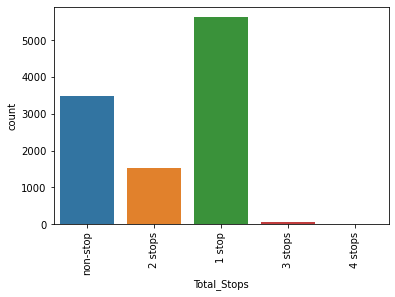

In [35]:
sns.countplot(df['Total_Stops'])
plt.xticks(rotation=90)

#### Observation- Most of them has 1 stop and very few has 4 stops

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

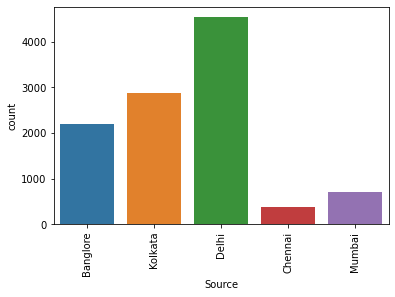

In [36]:
sns.countplot(df['Source'])
plt.xticks(rotation=90)

#### Observation- Most of the flights are getting booked having source as Delhi and least are having Chennai

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

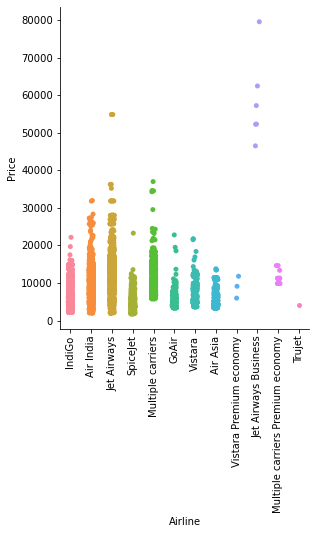

In [37]:
sns.catplot(x="Airline", y= "Price", data=df)
plt.xticks(rotation=90)

#### Observation- Jet Airways business class is having the most price ranging from 50000 to 80000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

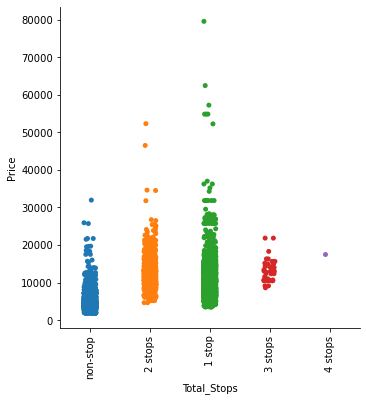

In [38]:
sns.catplot(x="Total_Stops", y= "Price", data=df)
plt.xticks(rotation=90)

#### Observation- 1 stops are having highest price and non-stops are having least prices

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

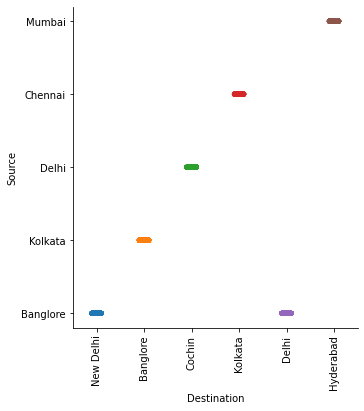

In [39]:
sns.catplot(x="Destination", y= "Source", data=df)
plt.xticks(rotation=90)

#### Observation- we have flight-
- Bangalore to New Delhi
- Kolkata to Bangalore
- Delhi to Cochin
- Chennai to Kolkata
- Bangalore to Delhi
- Mumbai to Hyderabad

<AxesSubplot:xlabel='Price', ylabel='Duration(mins)'>

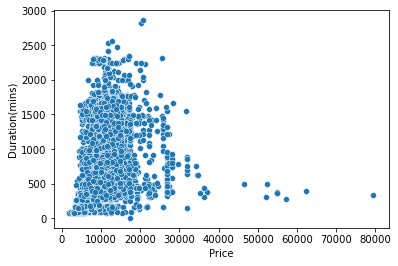

In [40]:
sns.scatterplot(df['Price'],df['Duration(mins)'], data=df)

#### Observation- Flight having highest fair is having flight time 490 mins

In [41]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey day,Journey month,Departure hour,Departure min,Arrival hour,Arrival min,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,160


### Dropping unnecessary columns

In [42]:
df.drop(["Route"], axis = 1, inplace = True)
test.drop(["Route"], axis = 1, inplace = True)

In [43]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey day,Journey month,Departure hour,Departure min,Arrival hour,Arrival min,Duration(mins)
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,285
5,SpiceJet,Kolkata,Banglore,non-stop,No info,3873,24,6,9,0,11,25,145
6,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,930
7,Jet Airways,Banglore,New Delhi,1 stop,No info,22270,1,3,8,0,5,5,1265
8,Jet Airways,Banglore,New Delhi,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,1530
9,Multiple carriers,Delhi,Cochin,1 stop,No info,8625,27,5,11,25,19,15,470


# Label Encoder to convert the dataset to numerical

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [46]:
df.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int32
Additional_Info    int32
Price              int64
Journey day        int64
Journey month      int64
Departure hour     int64
Departure min      int64
Arrival hour       int64
Arrival min        int64
Duration(mins)     int64
dtype: object

# Checking the Skewness

In [47]:
df.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
Journey day        0.118174
Journey month     -0.387409
Departure hour     0.112924
Departure min      0.167234
Arrival hour      -0.370146
Arrival min        0.110945
Duration(mins)     0.861411
dtype: float64

In [48]:
features = df.drop('Price', axis=1)
label = df['Price']

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

- log1p is reverse of exp(x) – 1

In [49]:
for col in features:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [50]:
df.skew()

Airline           -0.680164
Source            -0.424023
Destination        0.283053
Total_Stops        0.466329
Additional_Info   -1.779689
Price              1.812405
Journey day        0.118174
Journey month     -0.387409
Departure hour     0.112924
Departure min      0.167234
Arrival hour      -0.370146
Arrival min        0.110945
Duration(mins)    -0.169930
dtype: float64

#### Observation- I can see that skewness has been controlled 

# Using Boxplot to check the outliers

Airline               AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Source             AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Destination        AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Total_Stops        AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Additional_Info    AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Price              AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Journey day        AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Journey month         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Departure hour     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Departure min      AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Arrival hour       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Arrival min        AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Duration(mins)     AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
dtype: object

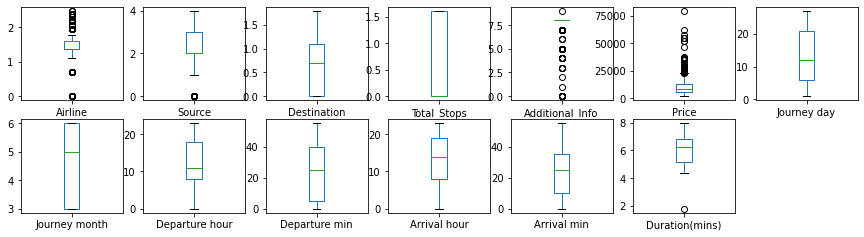

In [51]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

#### Observation-
- Airline has outliers
- Source has outliers

# Removing Outliers:

In [52]:
df.shape

(10682, 13)

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(10682, 13)

In [54]:
threshold =3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6474,  6576,  6576,  6588,  6605,  6991,  7351,
        7356,  7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,
        7902,  8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,
        8957,  8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,
        9714,  9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363,
       10363, 10382, 10438, 10510, 10510], dtype=int64), array([ 5,  5,  5,  5,  5,  5,  

In [55]:
df_new_z=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new_z.shape)

(10682, 13)
(10576, 13)


# Loss of Data

In [56]:
loss_percentage=(10682-10576)/10682*100
print(loss_percentage)

0.9923235349185546


#### Observation- Around 0.99% of Data has been loss. 

Airline               AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Source             AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Destination        AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Total_Stops        AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Additional_Info    AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Price              AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Journey day        AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Journey month         AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Departure hour     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Departure min      AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Arrival hour       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Arrival min        AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Duration(mins)     AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
dtype: object

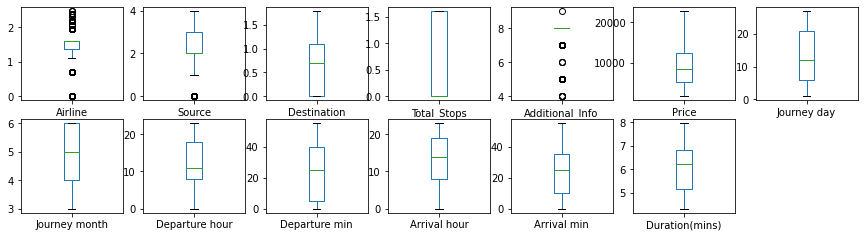

In [58]:
df_new_z.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

#### Observation- Skewness has been controlled

# Heatmap to check the correlation

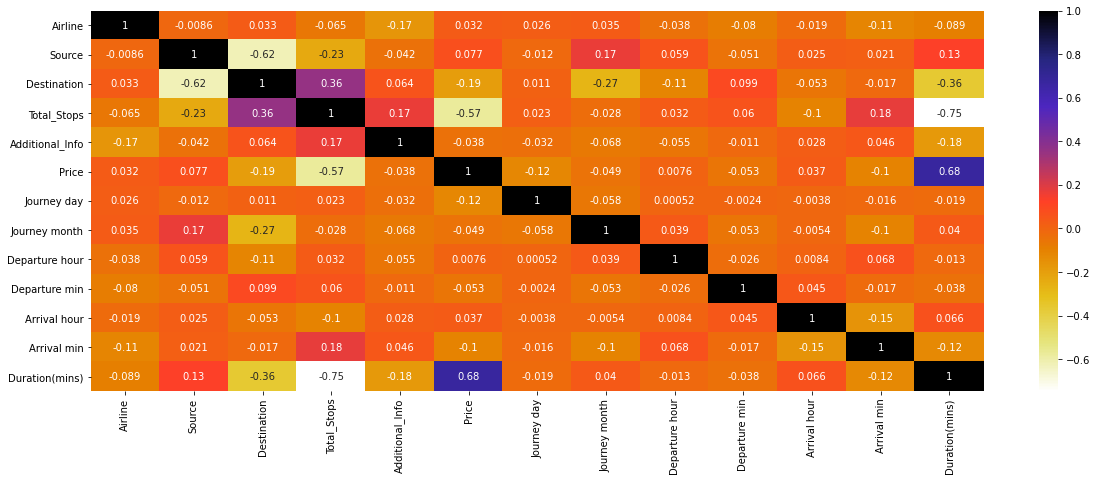

In [59]:
plt.figure(figsize=(20,7))
cor=df_new_z.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

## Dropping the columns having 70% correlated

In [60]:
X= df_new_z.drop("Price",axis=1)
y=df_new_z["Price"]

In [61]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [62]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

## Checking the columns having more than 70% correaltion and dropping them

In [64]:
corr_features

{'Duration(mins)'}

In [65]:
df_new_z=df_new_z.drop(corr_features,axis=1)


# Finding the unique value for all columns

In [66]:
for i in df_new_z:
    print(i , len(df_new_z[i].unique()))

Airline 11
Source 5
Destination 6
Total_Stops 5
Additional_Info 6
Price 1821
Journey day 10
Journey month 4
Departure hour 24
Departure min 12
Arrival hour 24
Arrival min 12


# Checking VIF 

In [67]:
names = list(df_new_z.drop(columns=["Price"]))

In [70]:
for index in range(0, len(names)):
            y = df_new_z.loc[:, df_new_z.columns == names[index]]
            x = df_new_z.loc[:, df_new_z.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )
            print()


R Square value of Airline column is 0.88 keeping all other columns as independent features
Variance Inflation Factor of Airline column is 8.13 n

R Square value of Source column is 0.83 keeping all other columns as independent features
Variance Inflation Factor of Source column is 5.72 n

R Square value of Destination column is 0.78 keeping all other columns as independent features
Variance Inflation Factor of Destination column is 4.48 n

R Square value of Total_Stops column is 0.68 keeping all other columns as independent features
Variance Inflation Factor of Total_Stops column is 3.11 n

R Square value of Additional_Info column is 0.96 keeping all other columns as independent features
Variance Inflation Factor of Additional_Info column is 27.28 n

R Square value of Journey day column is 0.71 keeping all other columns as independent features
Variance Inflation Factor of Journey day column is 3.5 n

R Square value of Journey month column is 0.93 keeping all other columns as independen

#### Observation- VIF of each columns are looking good (setting 10 as limit)

# Model Building

In [71]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_new_z.drop('Price', axis=1)
y = df_new_z['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

### Linear Regression

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.3634
Test Score : 0.3204


 ### Ridge

In [73]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.3634
Test Score : 0.3204


### Gradient Boost

In [74]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8399
Test Score : 0.8221


### K-Nearest Neighbors

In [75]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8793
Test Score : 0.7960


### Random Forest

In [76]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9860
Test Score : 0.9179


### Decision Tree

In [77]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9961
Test Score : 0.8464


# Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [79]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.3204
Best Parameters : {'alpha': 10}
Best CV Score : 0.3610


### Gradient Boost

In [80]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.9274
Best Parameters : {'max_depth': 8}
Best CV Score : 0.9194


### K-Nearest Neighbors

In [81]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.8076
Best Parameters : {'n_neighbors': 3}
Best CV Score : 0.8011


### Random Forest

In [82]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.9214
Best Parameters : {'max_depth': 15}
Best CV Score : 0.9132


### Decision Tree

In [83]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.8583
Best Parameters : {'max_depth': 15}
Best CV Score : 0.8558


### Result

In [84]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.320440
1,Gradient Boost,0.927358
2,K-Nearest Neighbors,0.807588
3,Random Forest,0.921402
4,Decision Tree,0.858297


# Lets do the prediction

### Label Encoder for test dataset

In [85]:
for col in test.columns:
    if test[col].dtypes == 'object':
        test[col] = le.fit_transform(test[col])

In [86]:
for col in test:
    if test.skew().loc[col]>0.55:
        test[col] = np.log1p(test[col])

In [87]:
test.shape

(2671, 12)

In [88]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(test))
z.shape

(2671, 12)

In [89]:
test_new_z=test[(z<3).all(axis=1)]
print(test.shape)
print(test_new_z.shape)

(2671, 12)
(2667, 12)


In [97]:
test_new_z.drop(["Duration(mins)"], axis = 1, inplace = True)

# Lets do the predicting

### As Gradiant boosting gave highest accuracy I am using this model for prediction

In [98]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search1 = GridSearchCV(model, param_grid, cv=5)
grid_search1.fit(X_train, y_train)
gb_score = grid_search1.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search1.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.9279
Best Parameters : {'max_depth': 8}
Best CV Score : 0.9194


### Saving the model

In [102]:
import pickle
filename = 'Flight_fare_prediction.pkl'
pickle.dump(grid_search1.best_params_,open(filename, 'wb'))

# Predicting on test data

In [101]:
import numpy as np
predicted=np.array(grid_search1.predict(test_new_z))
data_com = pd.DataFrame({"Predicted":predicted})
data_com.head(10)

,Predicted
0,15409.758214
1,15396.275915
2,14841.796250
3,13724.103645
4,4546.565762
5,15409.758214
6,13182.216174
7,14993.025261
8,2768.436666
9,15396.275915


# Determining the name of the file and saving the excel

In [103]:
file_name = 'Predcted data for flight fare.xlsx'
data_com.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
